In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
from sklearn.datasets import load_boston  # 사이킷런 데이타셋

In [2]:
#데이터 불러오기

from sklearn.datasets import load_linnerud

linnerud = load_linnerud()
print(linnerud.DESCR)

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [3]:
#데이터 확인

linnerud

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [4]:
#데이터프레임으로 변환

df = pd.concat([pd.DataFrame(linnerud.data, columns=linnerud.feature_names),
                pd.DataFrame(linnerud.target, columns=linnerud.target_names)],
               axis=1)
df.tail()

,Chins,Situps,Jumps,Weight,Waist,Pulse
15,12.0,210.0,120.0,202.0,37.0,62.0
16,4.0,60.0,25.0,176.0,37.0,54.0
17,11.0,230.0,80.0,157.0,32.0,52.0
18,15.0,225.0,73.0,156.0,33.0,54.0
19,2.0,110.0,43.0,138.0,33.0,68.0


In [5]:
#변환된 데이터 확인

df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [6]:
#데이터타입 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   Weight  20 non-null     float64
 4   Waist   20 non-null     float64
 5   Pulse   20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


In [7]:
#결측치 확인

df.isna().sum()

Chins     0
Situps    0
Jumps     0
Weight    0
Waist     0
Pulse     0
dtype: int64

In [8]:
#데이터 정규화

df_nomalization=(df-np.min(df,0))/(np.max(df,0)-np.min(df,0))

df_nomalization

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,0.2500,0.557214,0.155556,0.486239,0.333333,0.142857
1,0.0625,0.298507,0.155556,0.467890,0.400000,0.214286
2,0.6875,0.253731,0.337778,0.504587,0.466667,0.428571
3,0.6875,0.273632,0.053333,0.220183,0.266667,0.571429
4,0.7500,0.522388,0.146667,0.467890,0.266667,0.000000
5,0.1875,0.253731,0.075556,0.403670,0.333333,0.357143
6,0.4375,0.253731,0.057778,0.669725,0.466667,0.357143
7,0.3125,0.373134,0.066667,0.266055,0.200000,0.500000
8,0.8750,0.746269,0.066667,0.348624,0.000000,1.000000
9,1.0000,1.000000,1.000000,0.146789,0.133333,0.357143


In [9]:
df_np=df_nomalization.to_numpy()

df_np

array([[0.25      , 0.55721393, 0.15555556, 0.48623853, 0.33333333,
        0.14285714],
       [0.0625    , 0.29850746, 0.15555556, 0.46788991, 0.4       ,
        0.21428571],
       [0.6875    , 0.25373134, 0.33777778, 0.50458716, 0.46666667,
        0.42857143],
       [0.6875    , 0.27363184, 0.05333333, 0.22018349, 0.26666667,
        0.57142857],
       [0.75      , 0.52238806, 0.14666667, 0.46788991, 0.26666667,
        0.        ],
       [0.1875    , 0.25373134, 0.07555556, 0.40366972, 0.33333333,
        0.35714286],
       [0.4375    , 0.25373134, 0.05777778, 0.66972477, 0.46666667,
        0.35714286],
       [0.3125    , 0.37313433, 0.06666667, 0.26605505, 0.2       ,
        0.5       ],
       [0.875     , 0.74626866, 0.06666667, 0.34862385, 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , 0.14678899, 0.13333333,
        0.35714286],
       [1.        , 0.34825871, 0.05777778, 0.28440367, 0.2       ,
        0.14285714],
       [0.75      , 0

In [10]:
# 입력과 라벨로 데이터 나누기
x_data = df_np[ : , : -1]                
y_data = df_np[ : , -1]                
print(x_data.shape)
print(y_data.shape)

(20, 5)
(20,)


In [11]:
#test와 train 데이터로 나눔

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=0) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 5)
(4, 5)
(16,)
(4,)


In [12]:
#DNN

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


model = Sequential()

model.add(Dense(32,input_shape=(5,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(Adam(0.01),'mse',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 16)                1040      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 7,521
Trainable params: 7,521
Non-trainable params: 0
_________________________________________________________________


In [13]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=1,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test)
y_pred_class = np.argmax(y_pred)

Epoch 1/100
16/16 [==============================] - 1s 13ms/step - loss: 0.0607 - accuracy: 0.1250 - val_loss: 0.1946 - val_accuracy: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0495 - accuracy: 0.1250 - val_loss: 0.2575 - val_accuracy: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0599 - accuracy: 0.1250 - val_loss: 0.1642 - val_accuracy: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.1250 - val_loss: 0.1712 - val_accuracy: 0.0000e+00
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.1250 - val_loss: 0.1903 - val_accuracy: 0.0000e+00
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.1250 - val_loss: 0.2338 - val_accuracy: 0.0000e+00
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.1250 - val_loss: 0.1978 - val_accur

16/16 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.1250 - val_loss: 0.2803 - val_accuracy: 0.0000e+00
Epoch 58/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.1250 - val_loss: 0.2947 - val_accuracy: 0.0000e+00
Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.1250 - val_loss: 0.2264 - val_accuracy: 0.0000e+00
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.1250 - val_loss: 0.2427 - val_accuracy: 0.0000e+00
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.1250 - val_loss: 0.2763 - val_accuracy: 0.0000e+00
Epoch 62/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.1250 - val_loss: 0.2673 - val_accuracy: 0.0000e+00
Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0152 - accuracy: 0.1250 - val_loss: 0.2503 - val_accuracy: 0.

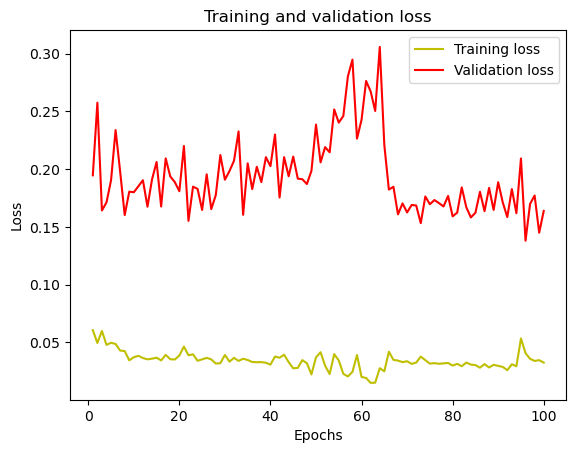

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

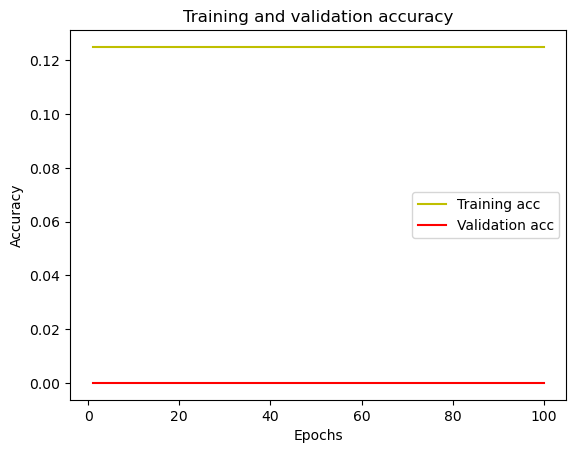

In [15]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
#Accuracy of the predicted values

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 111ms/step - loss: 0.1638 - accuracy: 0.0000e+00


[0.16382364928722382, 0.0]

In [17]:
#Convolution Layer

from keras.models import Sequential, Model
from keras.layers import Conv1D, Dense, Input, GlobalMaxPooling1D

input = Input(shape = (5,1))
conv = Conv1D(filters = 128, kernel_size = 2, padding = "valid", strides = 1, activation = "relu")(input)
pool = GlobalMaxPooling1D()(conv) 
hidden = Dense(32, activation="relu")(pool)       
output = Dense(1, activation="linear")(hidden) 
model_CNN = Model(input, output)
model_CNN.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5, 1)]            0         
                                                                 
 conv1d (Conv1D)             (None, 4, 128)            384       
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
___________________________________________________________

In [18]:
model_CNN.compile(Adam(0.01),'mse',metrics=['accuracy'])

model_CNN_history=model_CNN.fit(x=X_train, y=y_train, epochs=100, batch_size=1,validation_data= (X_test,y_test))
y_pred = model_CNN.predict(X_test)

y_test_class = np.argmax(y_test)
y_pred_class = np.argmax(y_pred)

Epoch 1/100
16/16 [==============================] - 0s 10ms/step - loss: 0.1141 - accuracy: 0.1250 - val_loss: 0.1607 - val_accuracy: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.1250 - val_loss: 0.1806 - val_accuracy: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.1250 - val_loss: 0.1719 - val_accuracy: 0.0000e+00
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.1250 - val_loss: 0.2409 - val_accuracy: 0.0000e+00
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.1250 - val_loss: 0.1756 - val_accuracy: 0.0000e+00
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0430 - accuracy: 0.1250 - val_loss: 0.1529 - val_accuracy: 0.0000e+00
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.1250 - val_loss: 0.1715 - val_accur

16/16 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.1250 - val_loss: 0.1418 - val_accuracy: 0.0000e+00
Epoch 58/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0287 - accuracy: 0.1250 - val_loss: 0.2156 - val_accuracy: 0.0000e+00
Epoch 59/100
16/16 [==============================] - 0s 5ms/step - loss: 0.0244 - accuracy: 0.1250 - val_loss: 0.1823 - val_accuracy: 0.0000e+00
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.1250 - val_loss: 0.1807 - val_accuracy: 0.0000e+00
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.1250 - val_loss: 0.1699 - val_accuracy: 0.0000e+00
Epoch 62/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.1250 - val_loss: 0.1936 - val_accuracy: 0.0000e+00
Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.1250 - val_loss: 0.2193 - val_accuracy: 0.

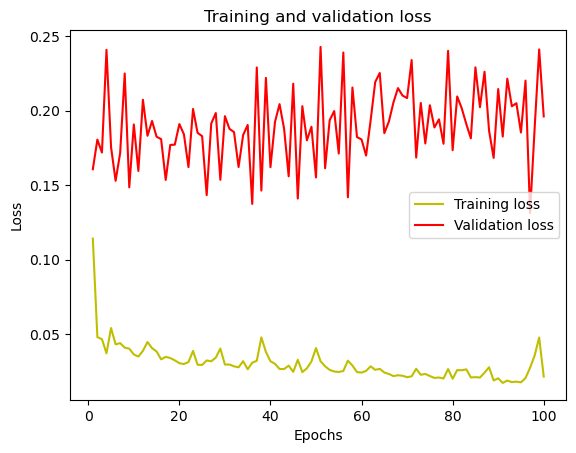

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_CNN_history.history['loss']
val_loss =model_CNN_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

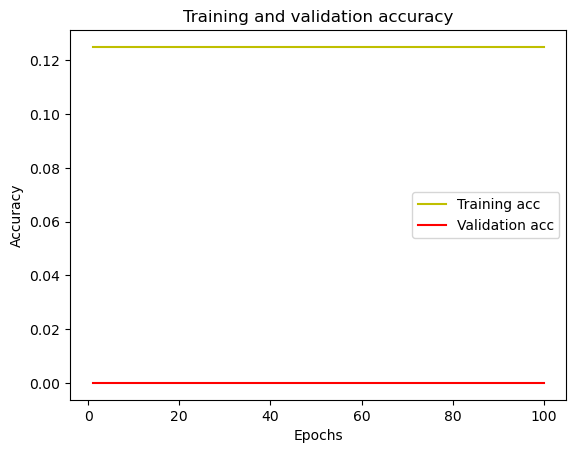

In [20]:
acc =model_CNN_history.history['accuracy']
val_acc =model_CNN_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
#Accuracy of the predicted values

model_CNN.evaluate(X_test, y_test)

1/1 [==============================] - 0s 115ms/step - loss: 0.1962 - accuracy: 0.0000e+00


[0.19619372487068176, 0.0]

In [22]:
#LSTM

from keras.models import Sequential, Model
from keras.layers import Dense, Input, LSTM

In [23]:
#모델의 입력데이터에 맞게 데이터크기 변형

x_LSTM_data = []                         # 입력데이터 리스트
y_LSTM_data = []                         # 출력데이터 리스트

for i in range(1, len(df_np) - 5) :   
  x_lstm = df_np[i : i + 5, : -1] 
  y_lstm = df_np[i + 5, -1]        
  x_LSTM_data.append(x_lstm)              
  y_LSTM_data.append(y_lstm)

x_LSTM_data = np.array(x_LSTM_data)
y_LSTM_data = np.array(y_LSTM_data)

print(x_LSTM_data.shape)
print(y_LSTM_data.shape)

(14, 5, 5)
(14,)


In [24]:
print(x_LSTM_data[0])                # 첫번쩨 입력 데이타
print(y_LSTM_data[0])                # 첫번째 리벨

[[0.0625     0.29850746 0.15555556 0.46788991 0.4       ]
 [0.6875     0.25373134 0.33777778 0.50458716 0.46666667]
 [0.6875     0.27363184 0.05333333 0.22018349 0.26666667]
 [0.75       0.52238806 0.14666667 0.46788991 0.26666667]
 [0.1875     0.25373134 0.07555556 0.40366972 0.33333333]]
0.35714285714285715


In [25]:
#test와 train 데이터로 나눔

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(x_LSTM_data,y_LSTM_data,test_size=0.2,random_state=0) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11, 5, 5)
(3, 5, 5)
(11,)
(3,)


In [26]:
#모델 설계

inputs = Input(shape=(5, 5))
lstm_layer = LSTM(64)(inputs) 
hidden1 = Dense(128, activation='relu')(lstm_layer)
outputs = Dense(1, activation='linear')(hidden1)
model_LSTM = Model(inputs = inputs, outputs = outputs)
model_LSTM.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5, 5)]            0         
                                                                 
 lstm (LSTM)                 (None, 64)                17920     
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 26,369
Trainable params: 26,369
Non-trainable params: 0
_________________________________________________________________


In [27]:
#모델 학습

model_LSTM.compile(Adam(0.01),'mse',metrics=['accuracy'])

model_LSTM_history=model_LSTM.fit(x=X_train, y=y_train, epochs=100, batch_size=1,validation_data= (X_test,y_test))
y_pred = model_LSTM.predict(X_test)

y_test_class = np.argmax(y_test)
y_pred_class = np.argmax(y_pred)

Epoch 1/100
11/11 [==============================] - 2s 43ms/step - loss: 0.2006 - accuracy: 0.0000e+00 - val_loss: 0.1022 - val_accuracy: 0.3333
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1108 - accuracy: 0.0000e+00 - val_loss: 0.0860 - val_accuracy: 0.3333
Epoch 3/100
11/11 [==============================] - 0s 5ms/step - loss: 0.1268 - accuracy: 0.0000e+00 - val_loss: 0.0980 - val_accuracy: 0.3333
Epoch 4/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0804 - accuracy: 0.0909 - val_loss: 0.1523 - val_accuracy: 0.0000e+00
Epoch 5/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0876 - accuracy: 0.0000e+00 - val_loss: 0.0983 - val_accuracy: 0.3333
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0668 - accuracy: 0.0000e+00 - val_loss: 0.0972 - val_accuracy: 0.3333
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0772 - accuracy: 0.0000e+00 - val_loss: 0.1168 - val_a

Epoch 58/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 0.0909 - val_loss: 0.1536 - val_accuracy: 0.3333
Epoch 59/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 0.0909 - val_loss: 0.1495 - val_accuracy: 0.3333
Epoch 60/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 0.0909 - val_loss: 0.1594 - val_accuracy: 0.3333
Epoch 61/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 0.0909 - val_loss: 0.1413 - val_accuracy: 0.3333
Epoch 62/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 0.0909 - val_loss: 0.1526 - val_accuracy: 0.3333
Epoch 63/100
11/11 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 0.0909 - val_loss: 0.1307 - val_accuracy: 0.3333
Epoch 64/100
11/11 [==============================] - 0s 5ms/step - loss: 9.7385e-04 - accuracy: 0.0909 - val_loss: 0.1226 - val_accuracy: 0.3333
Ep

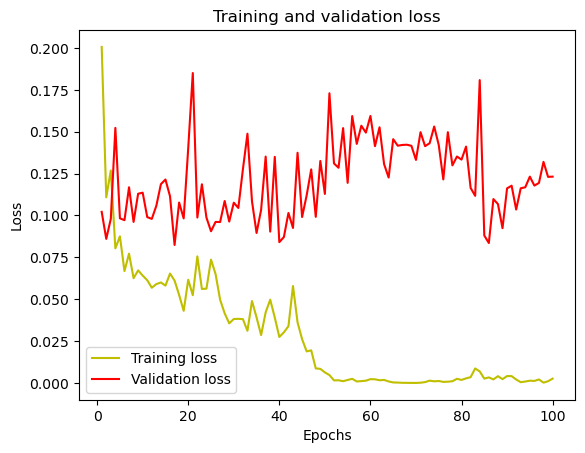

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_LSTM_history.history['loss']
val_loss =model_LSTM_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

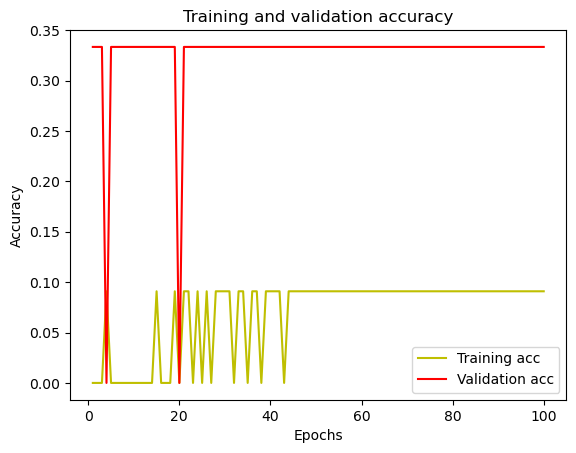

In [29]:
acc =model_LSTM_history.history['accuracy']
val_acc =model_LSTM_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
#Accuracy of the predicted values

model_LSTM.evaluate(X_test, y_test)

1/1 [==============================] - 0s 379ms/step - loss: 0.1232 - accuracy: 0.3333


[0.12317671626806259, 0.3333333432674408]